# Emission lines

In addition to creating and manipulating spectral energy distributions, `synthesizer` can also create `Line` objects, or more usefully collections of emission lines, `LineCollection` objects, that can be further analysed or manipulated. 

Like spectral energy distributions lines can be extracted directly from `Grid` objects or generated by `Galaxy` objects.

## Extracting lines from `Grid` objects

Grids that have been post-processed through CLOUDY also contain information on nebular emission lines. These can be loaded like regular grids, but there are a number of additional methods for working with lines as demonstrated in these examples:

In [1]:
import matplotlib.pyplot as plt
from synthesizer.grid import Grid
from synthesizer.line import (
    get_diagram_labels,
)

Let's begin by initialising a grid:

In [2]:
grid_dir = "../../tests/test_grid"
grid_name = "test_grid"
grid = Grid(grid_name, grid_dir=grid_dir)

We can easily get a list of the available lines:

In [3]:
print(grid.available_lines)

['AL 2 2660.35A', 'AR 3 7135.79A', 'AR 3 7751.11A', 'C 2 1037.02A', 'C 2 2325.40A', 'C 2 2326.93A', 'C 3 1906.68A', 'C 3 1908.73A', 'CA 2 7291.47A', 'CL 3 5517.71A', 'FE 2 2382.04A', 'FE 2 2625.67A', 'FE 3 4658.01A', 'FE 3 4701.62A', 'FE 3 4881.12A', 'FE 3 5270.40A', 'FE 4 2567.61A', 'FE 4 2829.36A', 'FE 4 2835.74A', 'FE 4 3094.96A', 'H 1 1.00521m', 'H 1 1.09410m', 'H 1 1.28215m', 'H 1 1.81790m', 'H 1 1.87561m', 'H 1 1.94507m', 'H 1 1215.67A', 'H 1 2.16611m', 'H 1 2.62585m', 'H 1 3836.47A', 'H 1 3890.15A', 'H 1 3971.19A', 'H 1 4.05224m', 'H 1 4102.89A', 'H 1 4341.68A', 'H 1 4862.69A', 'H 1 6564.62A', 'H 1 9231.50A', 'H 1 9548.54A', 'MG 2 2795.53A', 'MG 2 2802.71A', 'N 2 6548.05A', 'N 2 6583.45A', 'N 3 991.511A', 'NE 3 3868.76A', 'NE 3 3967.47A', 'O 1 6300.30A', 'O 2 2470.34A', 'O 2 3726.03A', 'O 2 3728.81A', 'O 3 1666.15A', 'O 3 4363.21A', 'O 3 4958.91A', 'O 3 5006.84A', 'S 2 6716.44A', 'S 2 6730.82A', 'S 3 6312.06A', 'S 3 9068.62A', 'S 3 9530.62A', 'SI 2 1179.59A', 'SI 2 1194.50A', 'S

This is also reported if we give the grid to the `print` function:

In [4]:
print(grid)

------------------------------
SUMMARY OF GRID
log10age: [ 6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3
  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7
  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1
 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11. ] 
metallicity: [1.0e-05 1.0e-04 1.0e-03 2.0e-03 3.0e-03 4.0e-03 6.0e-03 8.0e-03 1.0e-02
 1.4e-02 2.0e-02 3.0e-02 4.0e-02] 
C: Dopita2006 
CMB: False 
N: Dopita2006 
T_floor: 100 
U_model: ref 
alpha: 0.0 
axes: ['log10age' 'metallicity'] 
cloudy_version: c17.03 
cosmic_rays: True 
covering_factor: 1.0 
d2m: 0.3 
date: 2023-10-27 
geometry: spherical 
grains: True 
imf_masses: [1.e-01 3.e+02] 
imf_slopes:  
imf_type: chabrier03 
incident_axes: ['log10age' 'metallicity'] 
iterate_to_convergence: False 
log10U_ref: -2 
log10age: [ 6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3
  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7
  8.8  8.9

Let's choose an age and metallicity we want to get predictions. The in-built method will find the nearest grid point:

In [5]:
log10age = 6.0  # log10(age/yr)
metallicity = 0.01
# find nearest grid point
grid_point = grid.get_grid_point((log10age, metallicity))

Let's get information on a single line, in this case H-beta:

In [6]:
line_id = "H 1 4862.69A"
line = grid.get_line(grid_point, "H 1 4862.69A")
print(line)

----------
SUMMARY OF H 1 4862.69A
wavelength: 4862.7 Å
log10(luminosity/erg/s): 41.57
equivalent width: 4945956008 Å
----------


We can do this for a combination of lines (e.g. a doublet) like this. Note: this sums the contribution of each line. If you want separate lines using the `get_lines` method described below.

In [7]:
line = grid.get_line(
    grid_point, ["H 1 4862.69A", "O 3 4958.91A", "O 3 5006.84A"]
)
print(line)

----------
SUMMARY OF H 1 4862.69A,O 3 4958.91A,O 3 5006.84A
wavelength: 4942.8 Å
log10(luminosity/erg/s): 42.35
equivalent width: 30996673487 Å
----------


We can also create a `LineCollection` a collection of lines which have methods for calculating ratios and diagrams. By default this will create a collection for all available lines but you can also specify which lines you want.

In [8]:
lines = grid.get_lines(grid_point)
print(lines)

----------
LINE COLLECTION
lines: ['N 3 991.511A' 'C 2 1037.02A' 'SI 2 1179.59A' 'SI 2 1194.50A'
 'SI 2 1197.39A' 'SI 3 1206.50A' 'H 1 1215.67A' 'SI 2 1265.00A'
 'O 3 1666.15A' 'SI 3 1882.71A' 'SI 3 1892.03A' 'C 3 1906.68A'
 'C 3 1908.73A' 'C 2 2325.40A' 'C 2 2326.93A' 'FE 2 2382.04A'
 'O 2 2470.34A' 'FE 4 2567.61A' 'FE 2 2625.67A' 'AL 2 2660.35A'
 'MG 2 2795.53A' 'MG 2 2802.71A' 'FE 4 2829.36A' 'FE 4 2835.74A'
 'FE 4 3094.96A' 'O 2 3726.03A' 'O 2 3728.81A' 'H 1 3836.47A'
 'NE 3 3868.76A' 'H 1 3890.15A' 'NE 3 3967.47A' 'H 1 3971.19A'
 'H 1 4102.89A' 'H 1 4341.68A' 'O 3 4363.21A' 'FE 3 4658.01A'
 'FE 3 4701.62A' 'H 1 4862.69A' 'FE 3 4881.12A' 'O 3 4958.91A'
 'O 3 5006.84A' 'FE 3 5270.40A' 'CL 3 5517.71A' 'O 1 6300.30A'
 'S 3 6312.06A' 'N 2 6548.05A' 'H 1 6564.62A' 'N 2 6583.45A'
 'S 2 6716.44A' 'S 2 6730.82A' 'AR 3 7135.79A' 'CA 2 7291.47A'
 'AR 3 7751.11A' 'S 3 9068.62A' 'H 1 9231.50A' 'S 3 9530.62A'
 'H 1 9548.54A' 'H 1 1.00521m' 'H 1 1.09410m' 'H 1 1.28215m'
 'H 1 1.81790m' 'H 1 1.87

We can measure some predifined line ratios:

In [9]:
ratio_id = "BalmerDecrement"
ratio = lines.get_ratio(ratio_id)
print(f"{ratio_id}: {ratio:.2f}")

BalmerDecrement: 2.90


Or loop over all pre-defined ratios:

In [10]:
for ratio_id in lines.available_ratios:
    ratio = lines.get_ratio(ratio_id)
    print(f"{ratio_id}: {ratio:.2f}")

BalmerDecrement: 2.90
N2: 0.06
S2: 0.10
O1: 0.01
R2: 0.57
R3: 3.80
R23: 6.43
O32: 6.62
Ne3O2: 0.34


We can plot a ratio against metallicity by looping over the metallicity grid:

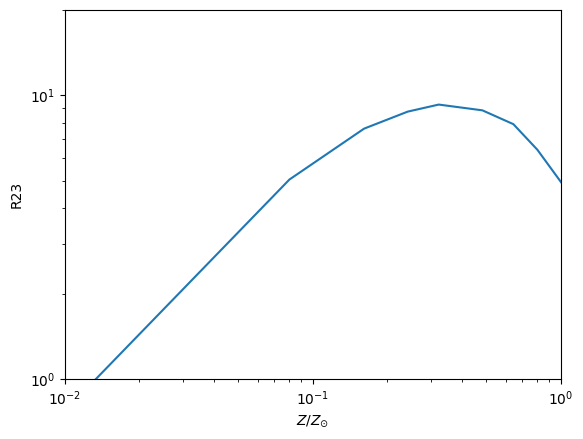

In [11]:
ratio_id = "R23"
ia = 0  # 1 Myr old for test grid
ratios = []
for iZ, Z in enumerate(grid.metallicity):
    grid_point = (ia, iZ)
    lines = grid.get_lines(grid_point)
    ratios.append(lines.get_ratio(ratio_id))

Zsun = grid.metallicity / 0.0124
plt.plot(Zsun, ratios)
plt.xlim([0.01, 1])
plt.ylim([1, 20])
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$Z/Z_{\odot}$")
plt.ylabel(rf"{ratio_id}")
# plt.ylabel(rf'${get_ratio_label(ratio_id)}$')
plt.show()

We can also generate "diagrams" pairs of line ratios like the BPT diagram

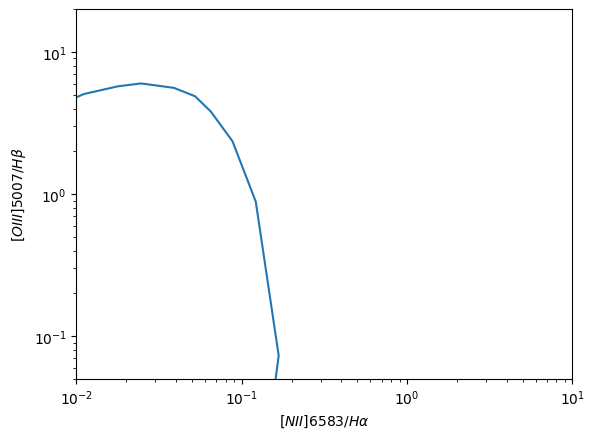

In [12]:
diagram_id = "BPT-NII"
ia = 0  # 1 Myr old for test grid
x = []
y = []
for iZ, Z in enumerate(grid.metallicity):
    grid_point = (ia, iZ)
    lines = grid.get_lines(grid_point)
    x_, y_ = lines.get_diagram(diagram_id)
    x.append(x_)
    y.append(y_)

plt.plot(x, y)
plt.xlim([0.01, 10])
plt.ylim([0.05, 20])
plt.xscale("log")
plt.yscale("log")

# grab x and y labels, this time use "fancy" label ids
xlabel, ylabel = get_diagram_labels(diagram_id)

plt.xlabel(rf"${xlabel}$")
plt.ylabel(rf"${ylabel}$")
plt.show()

## Lines from `Galaxy` objects